In [25]:
%matplotlib notebook

In [26]:
import MSData
import MSEval
from side_functions import get_logger

In [27]:
import matplotlib.pyplot as plt

In [28]:
logger = get_logger('/Users/nikadilli/code/imgMS/log.txt')
logger.info('Starting new session.')

In [29]:
reader = MSData.DataReader(filename='/Users/nikadilli/OneDrive - MUNI/Archeologie/Černá/meranie/200723 archeo/an1.csv', filetype='csv', instrument='Agilent')

In [30]:
d = MSData.MSData(reader, logger)

In [31]:
# d.read_param('/Users/nikadilli/OneDrive - MUNI/Geologie/granaty_copjakova/200618/phl_PARAM.xlsx')

In [32]:
d.read_srms()

In [33]:
io = MSEval.Iolite('/Users/nikadilli/OneDrive - MUNI/Archeologie/Černá/meranie/200723 archeo/an1.Iolite.csv')

In [34]:
d.select('iolite', s=60, iolite=io)

<IPython.core.display.Javascript object>


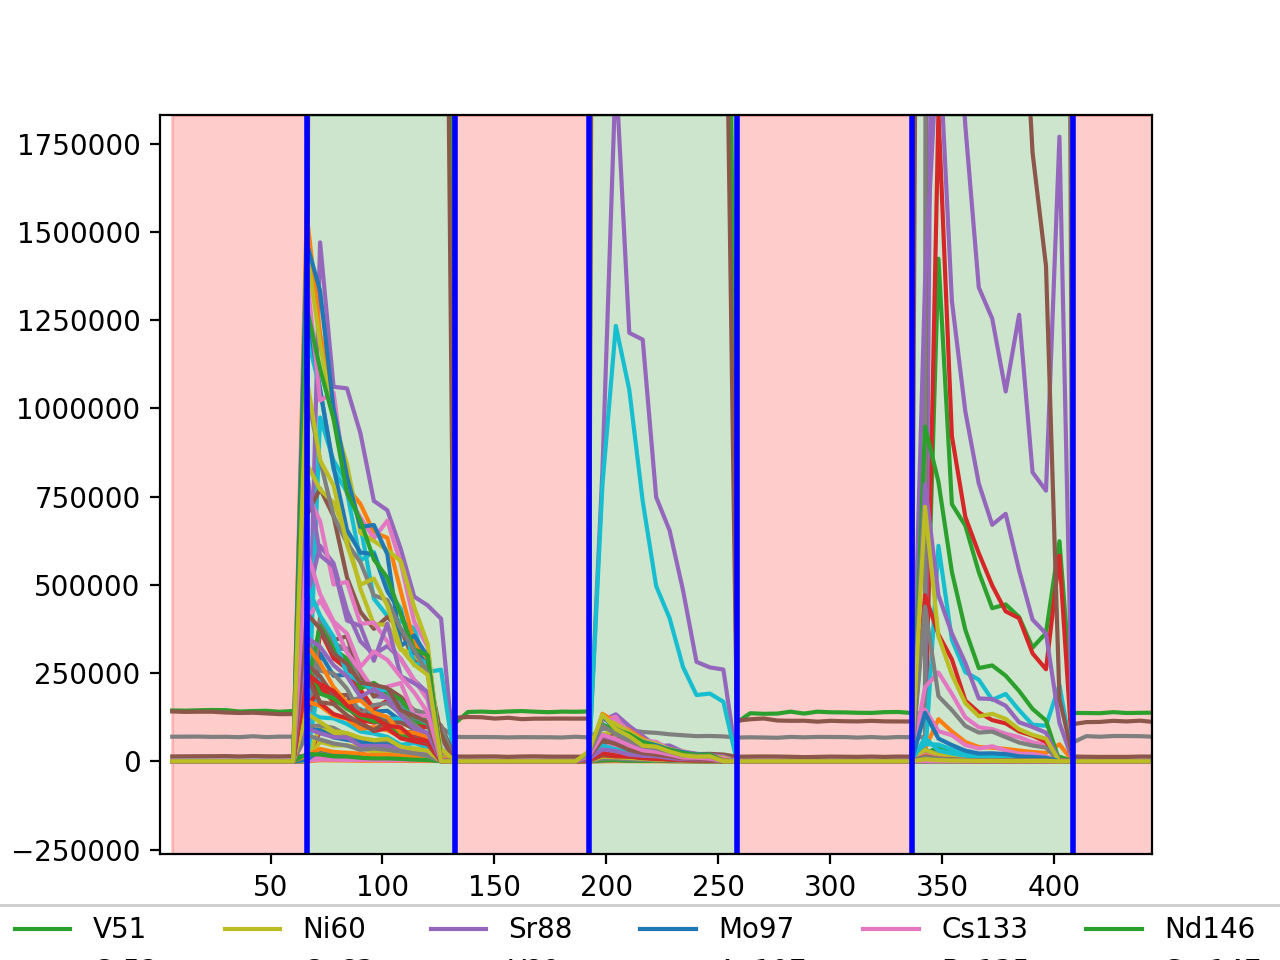

In [35]:
d.graph()

In [36]:
d.average_isotopes()

,Li7,B11,Na23,Mg24,Al27,Si28,P31,K39,Ca43,Ca44,...,Er166,Tm169,Yb172,Lu175,Hf177,Hf178,Pb208,Bi209,Th232,U238
0,10949.960303,1332.504545,1.161969e+07,4.021292e+04,6.382110e+05,6.847491e+06,1580.585909,6.153818e+04,24623.111818,4.444420e+05,...,206261.250909,609843.915000,133880.882121,573168.866970,114957.638485,169716.704848,198693.069697,267794.212727,466676.863939,458237.656667
1,959.749394,168.183636,1.222562e+07,5.657833e+03,6.349090e+05,7.793995e+06,69.991610,1.028311e+04,27969.566061,4.611258e+05,...,14572.733939,41574.956667,9386.572424,39503.714848,7627.473030,11676.035303,18766.348182,24881.570303,33652.941061,38291.545152
2,973.123840,65.833333,3.016019e+05,4.393033e+05,1.138493e+06,6.863409e+06,2729.599101,1.367070e+07,9947.855278,1.604107e+05,...,294.171944,122.222500,174.445000,118.611389,546.409167,746.423333,2883.393056,5.245098,2879.725278,1350.680833
3,1344.658182,96.970000,3.743257e+05,5.124571e+05,1.332407e+06,9.468886e+06,3754.470303,1.690695e+07,11829.048182,1.976257e+05,...,303.641515,143.352576,227.275758,144.848788,625.780000,885.807879,4258.608182,11.136364,3462.956667,1707.191212
4,1214.932727,54.488636,3.488811e+05,4.812285e+05,1.153996e+06,7.946852e+06,2483.203561,1.447892e+07,12174.698182,2.142825e+05,...,301.520000,142.727576,209.376818,141.497727,457.890000,712.152727,3150.406667,5.454545,3097.557576,1424.070909
5,1359.806667,71.231061,3.839620e+05,4.976114e+05,1.432739e+06,9.269682e+06,3080.659545,1.730931e+07,11489.967727,1.876658e+05,...,341.218485,176.060909,210.001515,123.939697,605.174848,863.379394,4347.111515,11.022727,3390.788788,1734.908788
6,1101.609837,65.833333,2.962627e+05,4.529581e+05,1.128159e+06,7.546068e+06,2897.917565,1.360578e+07,10164.740180,1.694424e+05,...,273.060000,140.833611,182.779444,118.055833,463.902500,730.315000,3384.584755,16.666667,2775.523056,1409.312500
7,1233.091061,75.000000,3.735630e+05,5.856175e+05,1.629495e+06,9.334202e+06,3518.753788,1.746442e+07,13402.918030,2.231197e+05,...,293.034242,133.636667,198.486970,116.060909,488.194848,737.455455,3604.145152,23.636364,3262.717273,1862.382727
8,294.236471,358.616389,1.959835e+05,1.985125e+06,2.749761e+05,5.484399e+06,24650.062222,2.237327e+07,53109.680000,8.091443e+05,...,107.500000,46.666667,58.333333,43.333333,119.313725,140.833611,5327.015327,17.500000,585.853333,244.170000
9,343.337879,412.146515,2.267246e+05,2.298371e+06,2.942070e+05,5.814906e+06,26637.291212,2.423999e+07,64579.491212,9.293929e+05,...,82.424242,44.545455,54.545455,46.363636,133.636364,185.757879,5975.344848,5.511364,599.110000,216.347121


In [37]:
d.names = io.names_from_iolite()

In [38]:
d.quantify_isotopes()

,Li7,B11,Na23,Mg24,Al27,Si28,P31,K39,Ca43,Ca44,...,Er166,Tm169,Yb172,Lu175,Hf177,Hf178,Pb208,Bi209,Th232,U238
NIST612,40.216182,45.654360,107867.827474,64.059675,10292.992988,387194.080036,19.549543,75.227454,90860.261169,87602.678715,...,32.177969,30.305831,32.587343,31.009938,29.352640,30.663122,40.725010,35.633460,33.377717,38.202627
1995,40.776609,17.870815,2661.063382,4973.923237,18456.972999,340963.935307,762.411597,100009.848949,32316.008288,30474.133197,...,0.649559,0.089093,0.605620,0.093109,2.102735,1.960226,6.257276,0.007512,2.856174,1.347544
1995,56.344937,26.323032,3302.712408,5802.192281,21600.670980,470400.177365,1048.671103,123685.045506,38427.139157,37544.072503,...,0.670469,0.104496,0.789033,0.113705,2.408176,2.326272,9.241641,0.015949,3.434636,1.703227
1995,50.909077,14.791236,3078.211760,5448.612908,18708.302380,394787.780493,693.590202,105922.522840,39549.997095,40708.453136,...,0.665785,0.104040,0.726893,0.111074,1.762088,1.870226,6.836724,0.007812,3.072225,1.420764
1995,56.979700,19.336057,3387.733934,5634.104573,23227.229752,460504.016471,860.467225,126628.593045,37325.622652,35651.929374,...,0.753443,0.128339,0.729062,0.097291,2.328881,2.267371,9.433703,0.015786,3.363058,1.730880
1995,46.160531,17.870815,2613.954932,5128.526814,18289.451581,374877.456136,809.425076,99534.888008,33020.567622,32189.926789,...,0.602942,0.102660,0.634555,0.092672,1.785226,1.917923,7.344916,0.023869,2.752824,1.406040
1995 k,51.669962,20.359156,3295.982753,6630.535322,26416.984091,463709.290381,982.832495,127763.360244,43539.918711,42387.320975,...,0.647047,0.097414,0.689087,0.091106,1.878710,1.936675,7.821386,0.033850,3.236034,1.858058
1996,12.329331,97.348362,1729.181878,22476.181755,4457.847322,272456.803368,6885.074552,163674.656453,172528.933233,153717.733353,...,0.237370,0.034017,0.202516,0.034016,0.459152,0.369851,11.560201,0.025062,0.581062,0.243603
1996,14.386817,111.879405,2000.413266,26022.836301,4769.613248,288875.903176,7440.132775,177330.917132,209789.076634,176562.035110,...,0.182000,0.032471,0.189365,0.036395,0.514270,0.487830,12.967146,0.007893,0.594210,0.215845
1996,10.673666,89.298148,1653.330521,21385.628467,6794.834668,258030.080258,5800.407552,156346.551595,164914.594383,147868.802752,...,0.179714,0.032195,0.179371,0.048408,0.722627,0.674054,10.985273,0.018744,0.744448,0.252195


In [43]:
d.quantified['8787']

NIST612    None
1995       None
1995       None
1995       None
1995       None
1995       None
1995 k     None
1996       None
1996       None
1996       None
1996       None
1996       None
1997       None
1997       None
1997       None
1997       None
1997       None
2000       None
2000       None
2000       None
2000       None
2000       None
NIST612    None
2001       None
2001       None
2001       None
2001       None
2001       None
2003       None
2003       None
           ... 
2015       None
2015       None
2015       None
2016       None
2016       None
2016       None
2016       None
2016       None
NIST612    None
2013       None
2013       None
2013       None
2013       None
2013       None
2014       None
2014       None
2014       None
2014       None
2014       None
2004       None
2004       None
2004       None
2004       None
2004       None
2005       None
2005       None
2005       None
2005       None
2005       None
NIST612    None
Name: 8787, Length: 86, 

In [46]:
d.isotope_names

array(['Li7', 'B11', 'Na23', 'Mg24', 'Al27', 'Si28', 'P31', 'K39', 'Ca43',
       'Ca44', 'Sc45', 'Ti47', 'V51', 'Cr52', 'Mn55', 'Fe56', 'Fe57',
       'Co59', 'Ni60', 'Cu63', 'Zn66', 'As75', 'Rb85', '8787', 'Sr88',
       'Y89', 'Zr90', 'Zr91', 'Nb93', 'Mo95', 'Mo97', 'Ag107', 'Cd111',
       'Sn118', 'Sn119', 'Sb121', 'Cs133', 'Ba135', 'Ba137', 'La139',
       'Ce140', 'Pr141', 'Nd146', 'Sm147', 'Eu153', 'Gd157', 'Tb159',
       'Dy163', 'Ho165', 'Er166', 'Tm169', 'Yb172', 'Lu175', 'Hf177',
       'Hf178', 'Pb208', 'Bi209', 'Th232', 'U238'], dtype=object)

In [47]:
d.TS_correction(skip_isotopes=['Ca43','Fe57','Zr91', 'Mo97', 'Sn119', 'Ba135', '8787', ])

,Li7,B11,Na23,Mg24,Al27,Si28,P31,K39,Ca44,Sc45,...,Er166,Tm169,Yb172,Lu175,Hf177,Hf178,Pb208,Bi209,Th232,U238
NIST612,35.979610,40.844902,96504.494089,57.311311,9208.677918,346405.130086,17.490097,67.302620,78374.176881,36.250541,...,28.788182,27.113264,29.154430,27.743197,26.260487,27.432916,36.434835,31.879654,29.861543,34.178172
1995,42.525444,18.637262,2775.191598,5187.245847,19248.559332,355587.264462,795.110058,104299.091266,31781.113890,7.298556,...,0.677418,0.092914,0.631594,0.097102,2.192917,2.044297,6.525639,0.007834,2.978670,1.405338
1995,43.911821,20.514572,2573.933423,4521.876201,16834.250798,366601.323106,817.270555,96392.611042,29259.569440,6.797019,...,0.522523,0.081438,0.614924,0.088614,1.876786,1.812955,7.202374,0.012429,2.676746,1.327392
1995,46.284763,13.447677,2798.603122,4953.689442,17008.938156,358927.325787,630.588100,96301.075520,37010.710419,8.434552,...,0.605308,0.094590,0.660866,0.100985,1.602029,1.700345,6.215712,0.007102,2.793160,1.291709
1995,44.998054,15.270087,2675.363942,4449.369553,18343.026387,363669.598824,679.528863,100001.233399,28155.070073,7.249625,...,0.595009,0.101352,0.575755,0.076833,1.839166,1.790590,7.449992,0.012466,2.655877,1.366912
1995,44.778344,17.335708,2535.685102,4974.962989,17741.809296,363652.475135,785.188406,96554.508131,31226.061636,6.424150,...,0.584888,0.099586,0.615554,0.089898,1.731771,1.860495,7.124987,0.023154,2.670396,1.363939
1995 k,39.980273,15.753149,2550.307437,5130.458747,20440.468304,358800.801030,760.478804,98858.480838,32797.714074,6.568275,...,0.500661,0.075375,0.533189,0.070495,1.453675,1.498526,6.051894,0.026192,2.503921,1.437695
1996,11.552213,91.212493,1620.191517,21059.507663,4176.869135,255283.846740,6451.108194,153358.240267,144028.902187,3.327040,...,0.222409,0.031873,0.189751,0.031872,0.430212,0.346540,10.831561,0.023482,0.544438,0.228249
1996,12.431655,96.675047,1728.558047,22486.345125,4121.425058,249617.804230,6429.022241,153231.729161,152567.337843,3.293629,...,0.157267,0.028058,0.163631,0.031449,0.444381,0.421534,11.204917,0.006820,0.513457,0.186512
1996,10.475216,87.637872,1622.590979,20988.016243,6668.501728,253232.656875,5692.563494,153439.678871,145119.552544,3.545289,...,0.176373,0.031596,0.176036,0.047508,0.709191,0.661522,10.781030,0.018395,0.730607,0.247506


In [16]:
d.isotopes['Li7(LR)'].detection_limit()

In [17]:
d.isotopes['Li7(LR)'].lod

1.1457598746274265

In [18]:
d.detection_limit()

Li7(LR)        1.145760
B11(LR)        4.321676
Al27(LR)      41.109086
Si29(LR)     916.491373
Ca43(LR)      97.299807
Ca44(LR)     106.155787
Mn55(LR)       0.583634
Fe57(LR)      45.783215
Sr88(LR)       0.090881
Y89(LR)        0.031062
Zr90(LR)       0.039283
Nb93(LR)       0.025419
Cs133(LR)      0.123220
Ba137(LR)      5.190418
La139(LR)      0.007081
Ce140(LR)      0.029518
Pr141(LR)      0.004181
Nd146(LR)      0.032886
Sm149(LR)      0.008230
Eu153(LR)      0.148414
Gd157(LR)      0.391123
Tb159(LR)      0.004719
Dy163(LR)      0.007355
Ho165(LR)      0.002046
Er166(LR)      0.007094
Tm169(LR)      0.014012
Yb172(LR)      0.017843
Lu175(LR)      0.006613
Hf178(LR)      0.036142
Th232(LR)      0.001777
U238(LR)       0.003150
Name: lod, dtype: float64

In [19]:
d.report()

In [20]:
d.corrected_TS

,Li7(LR),B11(LR),Al27(LR),Si29(LR),Ca43(LR),Ca44(LR),Mn55(LR),Fe57(LR),Sr88(LR),Y89(LR),...,Tb159(LR),Dy163(LR),Ho165(LR),Er166(LR),Tm169(LR),Yb172(LR),Lu175(LR),Hf178(LR),Th232(LR),U238(LR)
NIST612,76.90,353.00,20053.0,609351.0,144749.0,146989.0,70.000,116.0,137.000,63.500,...,68.4,65,69.4,70.7,68.8,71.2,69.2,66.300,67.3,69.4
Sx1d_phl_01,39.10,368.00,213173.0,413928.0,2622.0,3263.0,274.000,65943.0,139.000,5.780,...,< LoD,< LoD,0.004,0.009,< LoD,0.02,0.015,0.604,0.016,0.014
Sx1d_phl_02,42.70,348.00,213114.0,420268.0,2192.0,2911.0,224.000,64126.0,116.000,5.060,...,< LoD,0.017,0.004,0.021,< LoD,0.03,0.01,0.501,0.01,0.035
Sx1d_phl_03,50.20,330.00,219269.0,403647.0,2531.0,2958.0,364.000,70587.0,128.000,5.170,...,< LoD,0.02,0.019,0.014,< LoD,< LoD,0.012,0.583,0.03,0.027
Sx1d_phl_04,62.90,275.00,237696.0,383652.0,11416.0,11039.0,1532.000,80104.0,175.000,10.300,...,0.139,1.28,0.276,0.892,0.145,1.13,0.181,0.565,0.276,0.423
Sx1d_phl_05,40.10,304.00,211646.0,406514.0,2574.0,2980.0,301.000,72108.0,135.000,5.970,...,< LoD,0.034,0.005,0.034,< LoD,< LoD,0.016,0.420,0.02,0.041
Sx1d_phl_06,41.40,338.00,206675.0,433060.0,2097.0,2707.0,225.000,65302.0,107.000,4.610,...,0.005,0.023,0.006,0.017,< LoD,0.022,0.007,0.625,0.014,0.037
Sx1d_phl_07,44.10,307.00,209158.0,429701.0,2140.0,2619.0,218.000,64080.0,113.000,5.740,...,< LoD,0.022,< LoD,< LoD,< LoD,0.027,< LoD,0.439,0.008,0.034
Sx1d_phl_08,38.80,286.00,210178.0,425832.0,2384.0,2618.0,229.000,64777.0,117.000,5.670,...,0.006,0.032,0.024,0.012,< LoD,< LoD,0.008,0.393,0.027,0.045
NIST612,75.50,267.00,18685.0,616970.0,142023.0,145476.0,68.800,113.0,138.000,66.500,...,61.3,58.2,64.2,64.1,63.1,63.2,65,62.100,65.4,68.9


In [21]:
d.export('test.xlsx')

In [22]:
d.corrected_IS['Al27']

,Li7(LR),B11(LR),Al27(LR),Si29(LR),Ca43(LR),Ca44(LR),Mn55(LR),Fe57(LR),Sr88(LR),Y89(LR),...,Tb159(LR),Dy163(LR),Ho165(LR),Er166(LR),Tm169(LR),Yb172(LR),Lu175(LR),Hf178(LR),Th232(LR),U238(LR)
NIST612,41.20,189.00,10744.0,326477.0,77553.0,78753.0,37.500,62.2,73.200,34.000,...,36.7,34.8,37.2,37.9,36.9,38.1,37,35.500,36,37.2
Sx1d_phl_01,16.90,159.00,92145.0,178923.0,1133.0,1410.0,118.000,28504.0,60.000,2.500,...,< LoD,< LoD,< LoD,< LoD,< LoD,< LoD,< LoD,0.261,0.007,0.006
Sx1d_phl_02,18.50,151.00,92145.0,181713.0,948.0,1259.0,96.700,27726.0,50.400,2.190,...,< LoD,< LoD,< LoD,0.009,< LoD,< LoD,< LoD,0.217,0.004,0.015
Sx1d_phl_03,21.10,139.00,92145.0,169628.0,1064.0,1243.0,153.000,29663.0,53.700,2.170,...,< LoD,0.008,0.008,< LoD,< LoD,< LoD,< LoD,0.245,0.013,0.011
Sx1d_phl_04,24.40,106.00,92145.0,148726.0,4425.0,4279.0,594.000,31053.0,67.800,4.010,...,0.054,0.497,0.107,0.346,0.056,0.437,0.07,0.219,0.107,0.164
Sx1d_phl_05,17.50,132.00,92145.0,176985.0,1121.0,1297.0,131.000,31394.0,58.800,2.600,...,< LoD,0.015,0.002,0.015,< LoD,< LoD,0.007,0.183,0.009,0.018
Sx1d_phl_06,18.50,150.00,92145.0,193078.0,935.0,1207.0,100.000,29114.0,47.900,2.050,...,< LoD,0.01,0.003,0.007,< LoD,< LoD,< LoD,0.279,0.006,0.016
Sx1d_phl_07,19.40,135.00,92145.0,189306.0,943.0,1154.0,95.900,28230.0,49.800,2.530,...,< LoD,0.009,< LoD,< LoD,< LoD,< LoD,< LoD,0.194,0.004,0.015
Sx1d_phl_08,17.00,125.00,92145.0,186691.0,1045.0,1148.0,100.000,28399.0,51.300,2.480,...,< LoD,0.014,0.011,< LoD,< LoD,< LoD,< LoD,0.172,0.012,0.02
NIST612,43.40,154.00,10744.0,354770.0,81666.0,83652.0,39.600,64.8,79.400,38.200,...,35.3,33.5,36.9,36.8,36.3,36.4,37.4,35.700,37.6,39.6
